![matplotlib](https://matplotlib.org/_static/logo2.png)
# Data Visualization with Matplotlib


### Scenario:
![pups](shelter-pups.jpeg)
It's back to our animal shelter data!!! 

If you do not have the dataset clean and ready from the last exercise, we have a few functions to help later in the lesson.

While it is nice to have summary tables, visualizations are also great. We want a few visualizations to explore animal shelter demographics.


### Activation: Why is visualization important?


There are a lot of visualizations out there these days.

Ultimately they are about quickly revealing relationships and anomolies.

While we will review what makes a **GOOD** visualization later, we will cover a few basic types today.  


### Learning Goals:

After today, you will be able to:

- Explain and understand different types plots and their use cases
- Identify and adjust the anatomy of a matplotlib plot
- Explain the difference between plot types and justify their use cases:
    - barplots
    - histogram
    - scatter plot
    - pie char
- Visualize data using the matplotlib library in python 


### Step 1: Types of plots

Before we start creating, let's take a look at some [types](https://datavizproject.com/) of visualizations.

If you had to break these up into subgroups that fulfill a certain purpose, how would you break them up? Talk with your neighbors.


Let's look at some [examples from python graphs](https://python-graph-gallery.com/)

The Matplotlib plotting library provides a range of built in functions to start visualizing data with minimum effort. Let's import the module pyplot in matplotlib as well as numpy to generate some sample data before creating plots from our animal shelter data.

Text(0.5, 1.0, 'Sankey diagram with default settings')

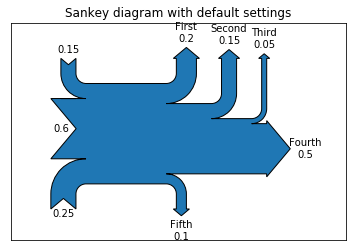

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
%matplotlib inline 
# basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10], labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")


### Please follow the instructions below to ensure your dataset for this lesson is in top shape
1. Copy the code from the `intake`, `outcomes`, and `merge` `.py` files and paste them into code cells into this workbook
2. examine the steps taken to transform and clean the code
3. Run intake, then outcomes, then the merge file in the code cells
4. Check the `.head()` of the new dataset
 

In [3]:
import pandas as pd

# read in some data
intakes = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')

# rename columns
new_names = ['id', 'name', 'i_date', 'monthyear', 'found_loc', 'intake_type', 'intake_con', 'type', 'sex', 'age', 'breed', 'color']
intakes.columns = new_names

# drop NaNs 
intakes.dropna(inplace=True)

# keep only a few columns
intake_data = intakes[['id','type', 'i_date', 'sex']]

# Clean code
intake_data['i_date']=intake_data['i_date'].map(lambda x: x[:10])
intake_data['i_date'] =  pd.to_datetime(intake_data['i_date'], format='%m/%d/%Y', errors = 'ignore')

# get more date info
intake_data['i_month'] = intake_data['i_date'].map(lambda x: x.month)
intake_data['year'] = intake_data['i_date'].map(lambda x: x.year)
intake_data['i_weekday'] = intake_data['i_date'].map(lambda x: x.weekday())

# drop "unknown" gender
intake_data = intake_data[intake_data.sex != 'Unknown']

# get sex variablle split
intake_data['gender']= intake_data['sex'].str.split(" ").str[1] 
intake_data['i_altered']= intake_data['sex'].str.split(" ").str[0] 



/Users/phoebe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/phoebe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/phoebe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [4]:
# Read in shelter data
animal_outcomes=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD') 

# change names
new_names = ['id', 'name', 'date', 'monthyear', 'dob', 'outcome', 'outcome_s', 'animal', 'sex', 'age', 'breed', 'color']
animal_outcomes.columns = new_names

# convert date formats
animal_outcomes.date = animal_outcomes['date'].map(lambda x: x[:10])
animal_outcomes['o_date'] =  pd.to_datetime(animal_outcomes['date'], format='%m/%d/%Y')
animal_outcomes['dob'] =  pd.to_datetime(animal_outcomes['dob'], format='%m/%d/%Y')

# get more date info
animal_outcomes['o_month'] = animal_outcomes['o_date'].map(lambda x: x.month)
animal_outcomes['year'] = animal_outcomes['o_date'].map(lambda x: x.year)
animal_outcomes['o_weekday'] = animal_outcomes['o_date'].map(lambda x: x.weekday())

#get age of animal
# I do not know why I had to cast them again... but it only worked when i did
animal_outcomes['date'] =pd.to_datetime(animal_outcomes['date'])
animal_outcomes['dob'] =pd.to_datetime(animal_outcomes['dob'])
animal_outcomes['age_in_days'] = animal_outcomes['date'] - animal_outcomes['dob']

animal_outcomes['years_old'] = animal_outcomes.age_in_days.map(lambda x: x.days/365)

# drop "unknown" gender
animal_outcomes = animal_outcomes[animal_outcomes.sex != 'Unknown']

# get sex variablle split
animal_outcomes['gender']= animal_outcomes['sex'].str.split(" ").str[1] 
animal_outcomes['o_altered']= animal_outcomes['sex'].str.split(" ").str[0] 

outcomes_data = animal_outcomes[['id', 'name','outcome', 'outcome_s', 'animal','breed', 'o_date', 'years_old', 'o_month', 'year', 'o_weekday', 'o_altered']]

outcomes_data.head()



,id,name,outcome,outcome_s,animal,breed,o_date,years_old,o_month,year,o_weekday,o_altered
0,A787348,Bear,Adoption,NaN,Dog,Chihuahua Shorthair Mix,2019-06-12,2.416438,6,2019,2,Neutered
1,A671852,*Frances,Return to Owner,NaN,Dog,Pit Bull Mix,2019-06-12,10.367123,6,2019,2,Spayed
2,A791606,NaN,Adoption,Foster,Cat,Domestic Medium Hair Mix,2019-06-12,0.221918,6,2019,2,Neutered
3,A793533,*Pearl,Adoption,Foster,Cat,Manx Mix,2019-06-12,0.213699,6,2019,2,Spayed
4,A793534,*Emerald,Adoption,Foster,Cat,Manx Mix,2019-06-12,0.213699,6,2019,2,Neutered


In [34]:
dog_age = animal_outcomes.loc[animal_outcomes['animal']=="Dog"]['years_old']

In [35]:
cat_age = animal_outcomes.loc[animal_outcomes['animal']=="Cat"]['years_old']

In [5]:
animal_shelter_df  = pd.merge(intake_data, outcomes_data, on=['id', 'year'],                                   how='left', suffixes=('_intake', '_outcome'))

animal_shelter_df = animal_shelter_df[(~animal_shelter_df['o_date'].isna()) &                                           (animal_shelter_df['o_date'] > animal_shelter_df['i_date'])]

animal_shelter_df['days_in_shelter'] = (animal_shelter_df['o_date'] - animal_shelter_df['i_date'])

animal_shelter_df['days_in_shelter'] = animal_shelter_df['days_in_shelter'].apply(lambda x: x.days)
                                                              



In [8]:
animal_shelter_df.head(10)

,id,type,i_date,sex,i_month,year,i_weekday,gender,i_altered,name,outcome,outcome_s,animal,breed,o_date,years_old,o_month,o_weekday,o_altered,days_in_shelter
26,A671852,Dog,2019-06-10,Spayed Female,6,2019,0,Female,Spayed,*Frances,Return to Owner,NaN,Dog,Pit Bull Mix,2019-06-12,10.367123,6.0,2.0,Spayed,2
38,A797195,Cat,2019-06-10,Neutered Male,6,2019,0,Male,Neutered,Tom,Return to Owner,NaN,Cat,Domestic Shorthair Mix,2019-06-11,2.002740,6.0,1.0,Neutered,1
41,A797193,Dog,2019-06-10,Neutered Male,6,2019,0,Male,Neutered,Cooper,Return to Owner,NaN,Dog,Miniature Poodle/Cavalier Span,2019-06-11,8.005479,6.0,1.0,Neutered,1
55,A790305,Dog,2019-06-10,Intact Male,6,2019,0,Male,Intact,Rocky,Return to Owner,NaN,Dog,Siberian Husky,2019-06-11,1.263014,6.0,1.0,Intact,1
59,A797136,Dog,2019-06-09,Intact Female,6,2019,6,Female,Intact,Precious,Return to Owner,NaN,Dog,Chihuahua Shorthair,2019-06-10,10.008219,6.0,0.0,Intact,1
68,A795365,Dog,2019-06-09,Neutered Male,6,2019,6,Male,Neutered,*Marty,Adoption,NaN,Dog,Labrador Retriever Mix,2019-06-10,0.443836,6.0,0.0,Neutered,1
73,A797103,Dog,2019-06-09,Intact Male,6,2019,6,Male,Intact,Rocky,Adoption,NaN,Dog,Rat Terrier Mix,2019-06-11,0.257534,6.0,1.0,Neutered,2
77,A797078,Dog,2019-06-09,Spayed Female,6,2019,6,Female,Spayed,Baby,Return to Owner,NaN,Dog,Chihuahua Shorthair,2019-06-10,2.002740,6.0,0.0,Spayed,1
80,A794077,Dog,2019-06-08,Spayed Female,6,2019,5,Female,Spayed,Dolly,Return to Owner,NaN,Dog,Pit Bull Mix,2019-06-09,2.101370,6.0,6.0,Spayed,1
89,A753753,Dog,2019-06-08,Intact Female,6,2019,5,Female,Intact,Daisy,Return to Owner,NaN,Dog,Cane Corso Mix,2019-06-11,2.331507,6.0,1.0,Intact,3


In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Set plot space as inline for inline plots display
%matplotlib inline


![msatplot](https://python-graph-gallery.com/wp-content/uploads/Logo_PGG_full-3.jpg)

The [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) has some great resources to guide you through the code needed to create each type of matplotlib plot. 

### Plot Anatomy
Let's spend some time on the terminology of a plot. There are a lot of options to set in matplotlib plots, so let's identify some common terminology. 

The sequence of events with matplotlib are:

| Step | Code Example |
| :---- | :------------ |
| 1. Create axis object | `ax = plt.subplot()` |
| 2. Create figure | `plt.bar` |
| 3. Make adjustments | `plt.title`, `ax.set_xticks`, etc |
| 4. Show final plot | `plt.show()` . |


The [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) shows a list of options you can set within a plot.

![matplotlib anatomy](https://matplotlib.org/_images/sphx_glr_anatomy_001.png)


Let's look [how they created this plot.](https://matplotlib.org/gallery/showcase/anatomy.html)

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

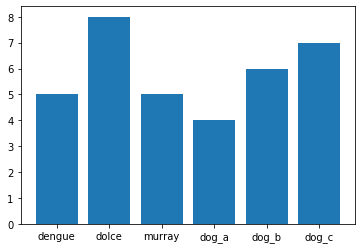

In [9]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"] 
dogs_age =  [5, 8, 5, 4, 6, 7]

plt.bar(range(len(our_dogs)), dogs_age)

ax.set_xticks(range(0,len(our_dogs))) # set ticks values, as a method of the axes
ax.set_xticklabels(our_dogs) # set tick labels, also as a method of the axes

plt.title('age of random dogs')
plt.xlabel('dogs')
plt.ylabel('age')
plt.show()

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

Text(0.5, 1.0, 'cat age')

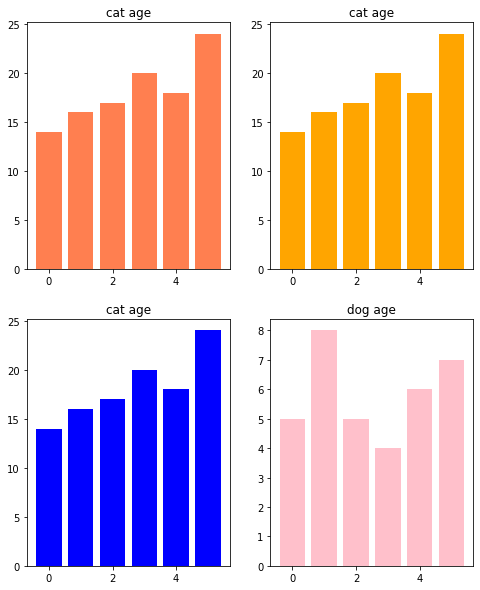

In [18]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
cats_age =  [14, 16, 17, 20, 18, 24]
fig = plt.figure(figsize = (8,10))
ax1 = plt.subplot(2,2,4)
plt.bar(range(len(our_dogs)),dogs_age, color = 'pink')
plt.title('dog age')
plt.subplot(2,2,2)
plt.bar(range(len(our_cats)),cats_age, color = 'orange')
plt.title('cat age')
plt.subplot(2,2,3)
plt.bar(range(len(our_cats)),cats_age, color = 'blue')
plt.title('cat age')
plt.subplot(2,2,1)
plt.bar(range(len(our_cats)),cats_age, color = 'coral')
plt.title('cat age')

What is something that you notice here that needs to be fixed?

ValueError: shape mismatch: objects cannot be broadcast to a single shape

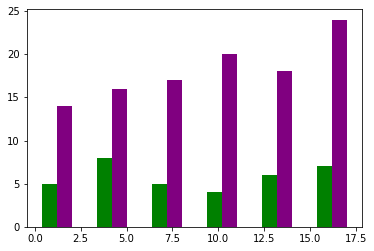

In [26]:
# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.
from matplotlib import pyplot as plt
fig = plt.figure()


n = 1  # This is our first dataset (out of 2)
t = 3  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

# essentially, this list comprehension gives us the position
dog_values = [t*element + w*n for element in range(d)]

# of the position of dogs
plt.bar(dog_values, dogs_age, color='green')


n = 2  # This is our second dataset (out of 2)
t = 3  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

cat_values = [t*element + w*n for element in range(d)]

plt.bar(cat_values, cats_age, color='purple')

n = 3  # This is our second dataset (out of 2)
t = 3  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

dc_values = [t*element + w*n for element in range(d)]


plt.bar(dc_values, dogs_age + cats_age, color='blue')


plt.legend(["dogs", "cats", "dogs+cats"])
n = 1

In [8]:
dog_values

[0.8, 2.8, 4.8, 6.8, 8.8, 10.8]

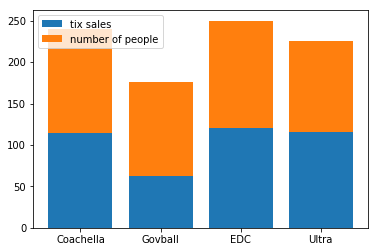

In [9]:
# stacked barplots
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon = [114, 62, 120, 116]
people_attended_in_thousands = [126, 114, 130, 110]

plt.bar(range(len(music_festivals)),
        ticket_sales_in_millon)
plt.bar(range(len(music_festivals)),
        people_attended_in_thousands,
        bottom=ticket_sales_in_millon)

plt.legend(["tix sales", "number of people"])
ax.set_xticks(range(0, len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.show()

### Bar plot - animal shelter dataset

Let's make a bar plot comparing dogs and cats by month when they are admitted to the shelter.

In [21]:
# Get data for Dog bar chart
dog_month=animal_shelter_df[(animal_shelter_df['animal']=='Dog') & (animal_shelter_df['year']==2018) ].groupby('i_month').size()

In [22]:
dog_month

i_month
1     750
2     681
3     839
4     726
5     693
6     653
7     681
8     652
9     734
10    635
11    514
12    375
dtype: int64

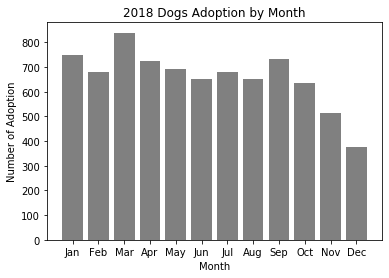

In [25]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"] 
#dogs_age =  [5, 8, 5, 4, 6, 7]

plt.bar(range(len(Months)), dog_month, color= 'grey')

ax.set_xticks(range(0,len(Months))) # set ticks values, as a method of the axes
ax.set_xticklabels(Months) # set tick labels, also as a method of the axes

plt.title('2018 Dogs Adoption by Month')
plt.xlabel('Month')
plt.ylabel('Number of Adoption')
plt.show()

In [10]:
# Make chart
ax = plt.subplot() 
months = dog_month.index 

NameError: name 'animal_shelter_df' is not defined

### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
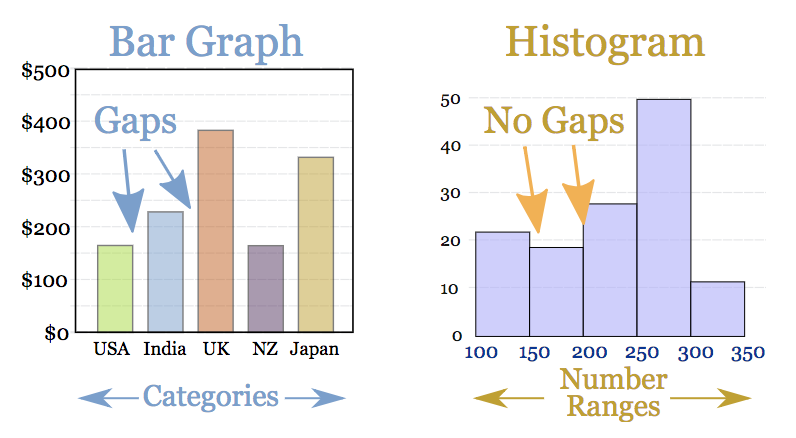

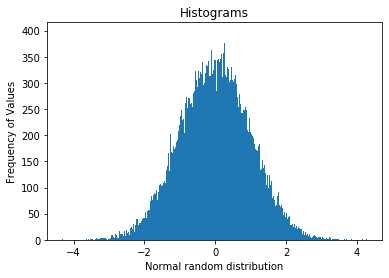

In [27]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

#Plot the distogram with hist() function
plt.hist(x, bins = 1000)

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

(array([0.29940361, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29940361, 0.29940361, 0.        ,
        0.        , 0.29940361, 0.        , 0.89821084, 0.29940361,
        0.59880723, 0.        , 0.        , 0.        , 0.        ,
        0.29940361, 0.59880723, 0.29940361, 0.29940361, 0.59880723,
        0.        , 0.59880723, 0.        , 0.        , 0.29940361,
        0.59880723, 0.        , 0.        , 0.        , 0.        ,
        0.29940361, 0.29940361, 0.59880723, 0.59880723, 0.        ,
        0.29940361, 0.59880723, 1.19761445, 0.89821084, 1.49701806,
        1.49701806, 0.89821084, 1.19761445, 1.19761445, 0.        ,
        2.09582529, 1.79642168, 0.89821084, 0.89821084, 1.79642168,
        2.09582529, 1.79642168, 1.49701806, 1.79642168, 2.3952289 ,
        2.99403613, 2.69463252, 2.69463252, 2.09582529, 4.49105419,
        2.09582529, 1.79642168, 4.7904578 , 2.99403613, 1.79642168,
        3.59284335, 2.99403613, 1.19761445, 2.39

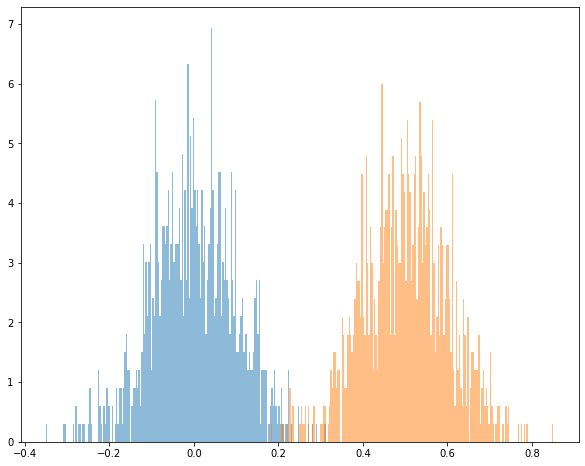

In [30]:
# overlaid histograms for two distributions
# plotting two histograms 
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.5, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize = (10,8))
plt.hist(s1, bins = 200, density = True, alpha=.5)
plt.hist(s2, bins = 200, density = True, alpha=.5)

### Histogram - animal shelter dataset

Let's make a **historgram** comparing dogs and cats by age when they are admitted to the shelter.

(array([5.07239032e-01, 8.30734647e-01, 2.62901467e-01, 6.37317083e-02,
        2.09170735e-02, 1.81390247e-01, 1.54917075e-02, 6.77843913e-02,
        1.01317075e-02, 3.68663420e-02, 8.17073183e-03, 3.31404883e-02,
        1.15697563e-02, 5.09853666e-03, 2.35970735e-02, 5.09853666e-03,
        2.20936589e-02, 4.51024397e-03, 2.61463419e-02, 6.20975619e-03,
        9.87024405e-03, 5.36000008e-03, 2.15707320e-03, 2.55580492e-02,
        2.54926833e-03, 6.60195132e-03, 1.89560978e-03, 1.23541465e-02,
        2.41853662e-03, 6.66731717e-03, 2.74536589e-03, 1.96097564e-03,
        5.22926837e-03, 1.24195124e-03, 5.94829277e-03, 8.49756110e-04,
        1.96097564e-03, 5.22926837e-04, 2.09170735e-03, 3.26829273e-04,
        0.00000000e+00, 1.30731709e-03, 6.53658546e-05, 2.61463419e-04,
        6.53658546e-05, 8.49756110e-04, 6.53658546e-05, 0.00000000e+00,
        0.00000000e+00, 1.96097564e-04]),
 array([-0.26575342,  0.17989041,  0.62553425,  1.07117808,  1.51682192,
         1.96246575, 

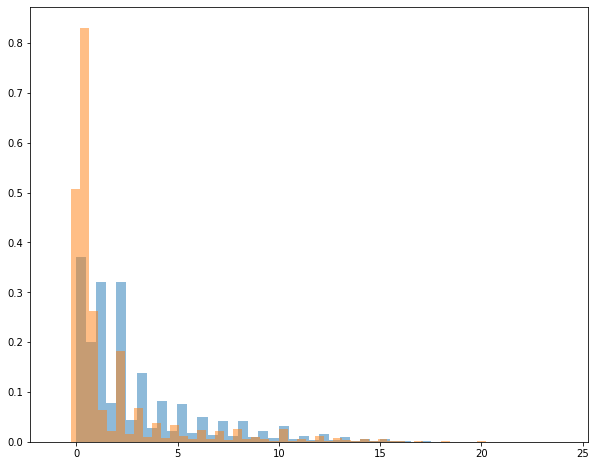

In [37]:
# overlaid histograms for two distributions
# plotting two histograms 
mu1, sigma1 = 0, 0.1 # mean and standard deviation
mu2, sigma2 = 0.5, 0.1
plt.figure(figsize = (10,8))
plt.hist(dog_age, bins = 50, density = True, alpha=.5)
plt.hist(cat_age, bins = 50, density = True, alpha=.5)

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

In [ ]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label = "Function: sin(x)" )
plt.title('Scatter Plot in Matplotlib')
plt.legend()

In [ ]:
# examining correlation with height and weight 
height = [63,62,60,63,64,65,68,67,64,71,72,70,73]
weight = [120,115,114,119,125,130,135,140,128,140,150,165,180]
plt.scatter(height, weight,color = 'r')

Scatterplots, again, are great for examining the relationship between two variables. We can create pair-wise scatterplot for variables in a dataframe if we want to find their the correlations between variables. Later in this course, we will learn about correlation heatmap. 


### Scatterplot - animal shelter data

For dogs that are adopted, create a scatter plot comparing age to how long a dog spends in the shelter between intake and adoption.

### 4 - Pie Charts

In [ ]:
# pie chart 
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Pop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

#Make your plot here
plt.figure(figsize=(10,8))
plt.pie(num_people_like ,labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()
plt.savefig("music_pie_chart.jpeg")
# saves the image to the directory

### Pie chart - animal shelter data

While pie charts are frowned upon, people might still ask you to make them.

Make a pie chart of cat outcomes.

## Putting it together:

If at any point you have questions about what a matplotlib function does, you have the `help()` function. 

In [ ]:
help(plt.axis)

What is one question that we had from earlier that we could answer with a visualization?

Please make that plot and then share it with a neighbor. 

## Assessment and reflection 